In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("heights.csv")
df.head(3)

,name,height
0,Aarav,5.45
1,Deepika,5.61
2,Abhishek,5.65


In [10]:
df.shape

(1000, 2)

<Axes: xlabel='height', ylabel='Count'>

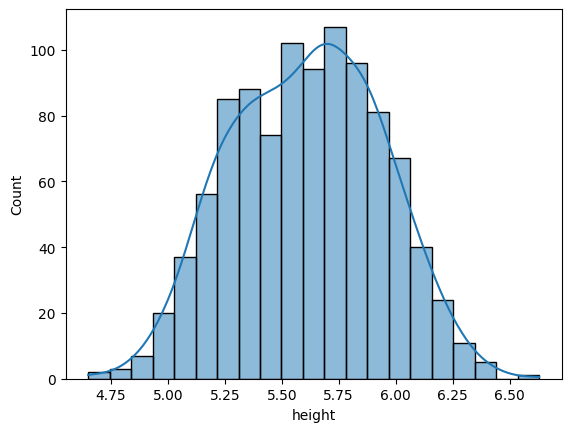

In [11]:
sns.histplot(df.height,kde=True)

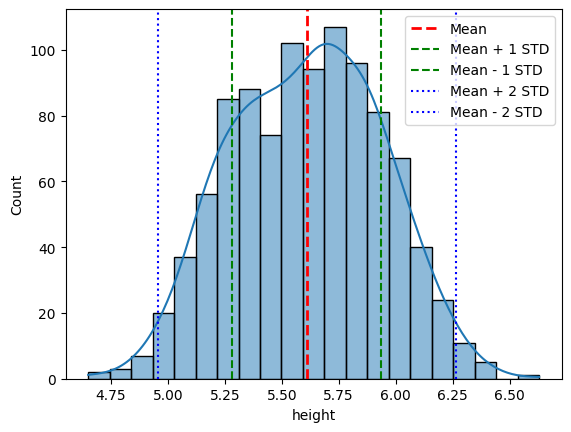

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram with KDE
sns.histplot(df.height, kde=True)

# Mean and Std
mean = df.height.mean()
std = df.height.std()

# Add mean line
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label='Mean')

# Add mean ± 1 std
plt.axvline(mean + std, color='green', linestyle='--', linewidth=1.5, label='Mean + 1 STD')
plt.axvline(mean - std, color='green', linestyle='--', linewidth=1.5, label='Mean - 1 STD')

# Add mean ± 2 std
plt.axvline(mean + 2*std, color='blue', linestyle=':', linewidth=1.5, label='Mean + 2 STD')
plt.axvline(mean - 2*std, color='blue', linestyle=':', linewidth=1.5, label='Mean - 2 STD')

# Add legend
plt.legend()
plt.show()

In [16]:
# Mean and Std
mean = round(df.height.mean(), 2)
std = round(df.height.std(), 2)

# 1σ bounds
left1  = round(mean - std, 2)
right1 = round(mean + std, 2)

# 2σ bounds
left2  = round(mean - 2*std, 2)
right2 = round(mean + 2*std, 2)

# 3σ bounds
left3  = round(mean - 3*std, 2)
right3 = round(mean + 3*std, 2)

left1, right1, left2, right2, left3, right3

(np.float64(5.28),
 np.float64(5.94),
 np.float64(4.95),
 np.float64(6.27),
 np.float64(4.62),
 np.float64(6.6))

Mean = 5.609, Std = 0.328
Empirical coverage from data:
  Within ±1σ: 64.10%
  Within ±2σ: 97.00%
  Within ±3σ: 99.90%

Theoretical Normal (Empirical Rule):
  ±1σ ≈ 68.27%,  ±2σ ≈ 95.45%,  ±3σ ≈ 99.73%


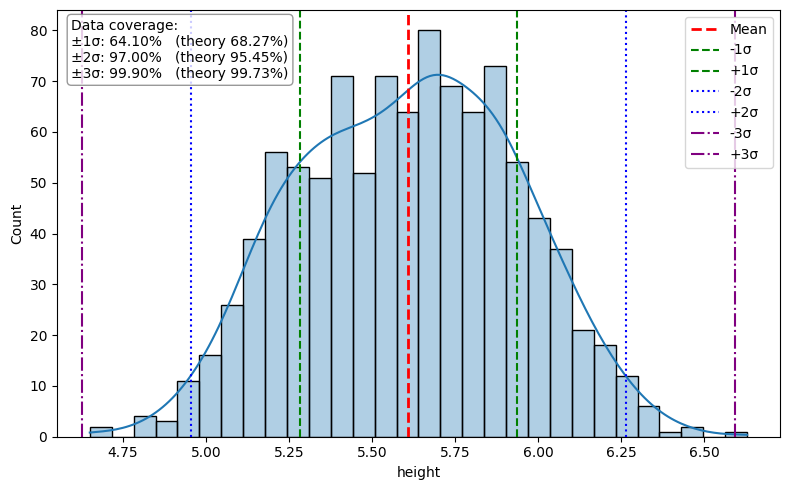

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

s = df.height.dropna()

# --- stats ---
mean = s.mean()
std  = s.std(ddof=1)   # sample std (what you usually want)

# bounds
left1,  right1  = mean - std,      mean + std
left2,  right2  = mean - 2*std,    mean + 2*std
left3,  right3  = mean - 3*std,    mean + 3*std

# --- empirical coverage from your data ---
p1 = (s.between(left1, right1)).mean() * 100
p2 = (s.between(left2, right2)).mean() * 100
p3 = (s.between(left3, right3)).mean() * 100

print(f"Mean = {mean:.3f}, Std = {std:.3f}")
print(f"Empirical coverage from data:")
print(f"  Within ±1σ: {p1:.2f}%")
print(f"  Within ±2σ: {p2:.2f}%")
print(f"  Within ±3σ: {p3:.2f}%")
print("\nTheoretical Normal (Empirical Rule):")
print("  ±1σ ≈ 68.27%,  ±2σ ≈ 95.45%,  ±3σ ≈ 99.73%")

# --- plot ---
plt.figure(figsize=(8,5))
ax = sns.histplot(s, kde=True, stat="count", bins=30, alpha=0.35, edgecolor="black")

# vertical markers
ax.axvline(mean,   ls="--", lw=2, color="red",   label="Mean")
ax.axvline(left1,  ls="--", lw=1.5, color="green",  label="-1σ")
ax.axvline(right1, ls="--", lw=1.5, color="green",  label="+1σ")
ax.axvline(left2,  ls=":",  lw=1.5, color="blue",   label="-2σ")
ax.axvline(right2, ls=":",  lw=1.5, color="blue",   label="+2σ")
ax.axvline(left3,  ls="-.", lw=1.5, color="purple", label="-3σ")
ax.axvline(right3, ls="-.", lw=1.5, color="purple", label="+3σ")

# annotate coverage on top
txt = (f"Data coverage:\n"
       f"±1σ: {p1:.2f}%   (theory 68.27%)\n"
       f"±2σ: {p2:.2f}%   (theory 95.45%)\n"
       f"±3σ: {p3:.2f}%   (theory 99.73%)")
ax.text(0.02, 0.98, txt, transform=ax.transAxes, va="top", ha="left",
        fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.8))

ax.set_xlabel("height")
ax.set_ylabel("Count")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

###•	±1σ → ~68%
	•	±2σ → ~95%
	•	±3σ → ~99.7%

(Empirical Rule — 68–95–99.7 Rule)
